<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
The input layer represents the actual, "raw" data that you input into the neural network. There is one node per variable that you want to input. 
### Hidden Layer:
The hidden layers are those layers that do the actual transforming of the input data, using weights and biases (different weights & biases per layer), based on how the neural network has been trained. Depending on the complexity of the neural network/data, you may have more hidden layers. They are called hidden layers because we don't 'see' how they work -- they happen 'under the hood'. 
### Output Layer:
The output layer is the resulting output from the neural network, and it will be a value from 0 to 1. Depending on the NN you're using and the problem you're trying to answer, there can be one or more nodes in the output layer.
### Neuron:
The neurons, or nodes, of a neural network, act like a function. They receive data (one number) as input, and transform it based on the given weights and biases, and pass the new value on to the next neuron/node. 
### Weight:
The weight is a number in a given layer that is multiplied by the incoming value, in order to transform it to pass on to the next layer of neurons. Weights are tuned as part of the training process for the neural network.
### Activation Function:
The activation function is what is housed within each node that determines what/"how much" to pass along to the next layer of nodes. It is called an activation function because it's based on activation of biological neurons, which are only activated after a certain threshold is met. With artificial neural networks, the node uses the activation function to transform its data (commonly using a Sigmoid function or Relu function) to determine which value to pass on to the next layer. 
### Node Map:
A node map is a visual representation of a neural network, to help understand the relationship between the node layers, and which types of nodes they are, and how it all flows together.
### Perceptron:
A perceptron is the most basic kind of neural network. It consists of any number of inputs, and creates a single output, with no hidden layers. The perceptron is best at categorizing linearly separable data. 

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

A neural network first receives data input, from at least two variables, and usually more. This is the data you pass into your code. Each variable goes into a node, and from there is put through a series of layers (depending on the network). Each node within a given layer receives input from the previous layer (beginning with the input layer), and then multiplies that value by the weight, adds the bias, and then puts the value through the activation function in order to determine what value to pass to the next layer, which then repeats the process until an output (or many outputs) of 0 to 1 is provided, which can then be used to apply back to your data.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [5]:
# Imports
import pandas as pd
import numpy as np

In [1]:
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [10]:
# Create Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create Sigmoid dertivative function
def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [39]:
# Initialize random weights
weights = np.array([0.0,0.0,0.0])

# Define inputs, including an extra column of noise to help
# Perceptron sort through data
inputs = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
])

# Define correct outputs
correct_outputs = np.array(df.y)

In [40]:
correct_outputs

array([1, 1, 1, 0])

In [27]:
type(weights[0])

numpy.float64

In [41]:
# Create perceptron in for loop...
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate the Sigmoid function
    activated_output = sigmoid(weighted_sum)
    
    # Calculate error
    error = correct_outputs - activated_output
    
    # Adjust error
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[-11.83940805 -11.83940805  17.80797679]
Output after training
[0.99999998 0.99744837 0.99744837 0.00281285]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [42]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [68]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X = diabetes[feats]

normalized = Normalizer().fit_transform(X)

In [45]:
feats

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [60]:
np.zeros(1+ diabetes[feats].shape[1])

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [91]:
##### Update this Class #####

class Perceptron(object):
    
    def __init__(self, niter = 10):
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)

    def fit(self, X, y):
        """
        Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """    
        # Initialize Weights as Zeros
        self.weights = np.zeros(X.shape[1])
        
        for i in range(self.niter):
            # Weighted sum of inputs / weights
            weighted_sum = np.dot(X, self.weights)

            # Activate!
            activated_output = sigmoid(weighted_sum)
            
            # Cac error
            error = y - activated_output

            # Update the Weights
            adjustments = error * sigmoid_derivative(activated_output)
            self.weights += np.dot(X.T, adjustments)
        
        return self.weights

    def predict(self, X):
        """Return class label after unit step"""
        calculations = np.dot(X, self.weights)
        return np.where(calculations >= .5, 1, 0)

In [90]:
# Define X training vectors and y target values
X = Normalizer().fit_transform(diabetes[feats])
y = diabetes['Outcome']

In [115]:
perceptron = Perceptron(150)
weights = perceptron.fit(X, y)
weights

array([ 30.0738127 , -14.71242511, -93.98387466, -13.61855156,
       -16.99418773,  -0.87510791,   1.04191842,  -5.00087061])

In [100]:
np.dot(X, weights)

array([ 38.76344526,  27.88956287,  45.4972655 ,  33.82485312,
        43.56429432,  34.49818687,  35.56675348,  57.02673109,
        32.64241943,  29.2831833 ,  27.61650995,  42.11930082,
        36.90471111,  27.98399562,  42.45816651,  56.63618583,
        31.09759131,  32.7733528 ,  45.67548569,  37.95060129,
        31.74486781,  27.77645555,  41.23516411,  31.80658534,
        36.71753472,  39.79927045,  39.10246097,  34.21995595,
        40.47976322,  29.3991166 ,  31.51751159,  37.24297707,
        37.4812569 ,  22.54492538,  33.42541865,  33.86540356,
        38.03051004,  29.24135267,  27.50616317,  32.80233432,
        47.55314484,  34.84095712,  26.29463553,  35.67269237,
        43.52575531,  42.92626837,  43.96218644,  21.56723334,
        32.78562443,  57.23506028,  33.58678276,  42.34026954,
        32.45233696,  36.31668333,  34.00525688,  32.12589852,
        39.18360555,  28.72774008,  37.06968617,  35.11158514,
        56.85168418,  38.28019155,  14.69981124,  43.09

In [113]:
predictions = perceptron.predict(X)

In [108]:
len(y)

768

In [116]:
sum(predictions - y)

192

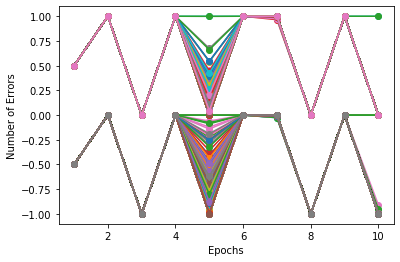

In [87]:
# Visualize training process
import matplotlib.pyplot as plt
pn = Perceptron()
fit = pn.fit(normalized, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.show()

In [81]:
perceptron.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Fresh attempt at a function

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?